# Gaussian Naive Bayes Scikit-Learn

## Kütüphaneler

In [1]:
!pip install matplotlib pandas numpy scikit-learn openpyxl

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
#datapreprocessingden veriyi almak için
%run dataPreprocessing.ipynb

Veri seti boyutu: (9400, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9400 non-null   int64  
 1   gender             9400 non-null   object 
 2   age                9400 non-null   float64
 3   hypertension       9400 non-null   int64  
 4   heart_disease      9400 non-null   int64  
 5   ever_married       9400 non-null   object 
 6   work_type          9400 non-null   object 
 7   Residence_type     9400 non-null   object 
 8   avg_glucose_level  9400 non-null   float64
 9   bmi                9400 non-null   float64
 10  smoking_status     9400 non-null   object 
 11  stroke             9400 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 881.4+ KB
None
                 id          age  hypertension  heart_disease  \
count   9400.000000  9400.000000   9400.000000    9400.000

## Eğitim ve Test Verisini Ayırma

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## GaussianNB modelini oluşturma

In [8]:
print("\n--- Scikit-Learn GaussianNB Modeli ---")
sk_model = GaussianNB()


--- Scikit-Learn GaussianNB Modeli ---


## Performans Ölçümleri ve Matris oluşturma Görselleştirme


Scikit-Learn Modeli Eğitim Süresi: 0.004120 sn
Scikit-Learn Modeli Tahmin Süresi: 0.001349 sn
Scikit-Learn Modeli Doğruluk Oranı: 0.5719858156028369
Scikit-Learn Karmaşıklık Matrisi:
 [[ 187 1203]
 [   4 1426]]


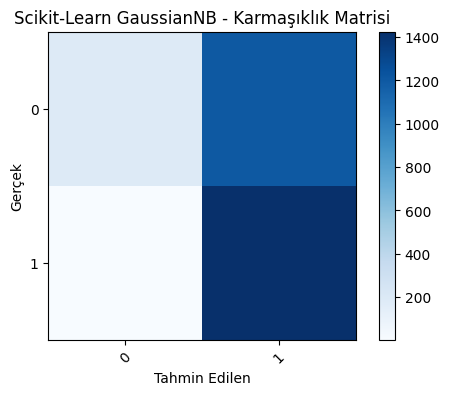

In [9]:
start_time = time.time()
sk_model.fit(X_train, y_train)
sk_fit_time = time.time() - start_time
start_time = time.time()
y_pred_sk = sk_model.predict(X_test)
sk_predict_time = time.time() - start_time
sk_cm = confusion_matrix(y_test, y_pred_sk)
sk_accuracy = accuracy_score(y_test, y_pred_sk)

print("Scikit-Learn Modeli Eğitim Süresi: {:.6f} sn".format(sk_fit_time))
print("Scikit-Learn Modeli Tahmin Süresi: {:.6f} sn".format(sk_predict_time))
print("Scikit-Learn Modeli Doğruluk Oranı:", sk_accuracy)
print("Scikit-Learn Karmaşıklık Matrisi:\n", sk_cm)

classes = np.unique(y)
tick_marks = np.arange(len(classes))

plt.figure(figsize=(6, 4))
plt.imshow(sk_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Scikit-Learn GaussianNB - Karmaşıklık Matrisi")
plt.colorbar()
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()